In [1]:
# test the fitting:
# Chi2 on lag-hr, hard bound = False

In [2]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary
import scipy.optimize as opt
import scipy.stats as st

In [3]:
folder = "0915_RTscore_150_100/"

In [4]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [5]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,gamma_fc,s_fc
0,1.0,0.0,0.757379,0.372246,0.644520,0.904823,0.061511,0.623429
1,1.0,1.0,0.742442,0.354791,0.826969,0.811465,0.726457,0.303531
2,1.0,2.0,0.757780,0.490051,0.828170,0.506361,0.781478,0.609606
3,1.0,3.0,0.537665,0.637587,0.781477,0.025999,0.741868,0.023404
4,1.0,4.0,0.757389,0.262933,0.323544,0.888527,0.038251,0.509841
...,...,...,...,...,...,...,...,...
9573,150.0,93.0,0.455900,0.157220,0.100004,0.265402,0.581208,0.052726
9574,150.0,94.0,0.455910,0.157208,0.100048,0.266615,0.582264,0.052723
9575,150.0,97.0,0.455901,0.157179,0.100066,0.265186,0.580928,0.052732
9576,150.0,98.0,0.455900,0.157213,0.100007,0.265426,0.581168,0.052750


In [8]:
pso_df.loc[pso_df.iter == 150]

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,gamma_fc,s_fc
9506,150.0,0.0,0.455898,0.157232,0.100007,0.265421,0.581140,0.052708
9507,150.0,1.0,0.455901,0.157272,0.100044,0.265403,0.581216,0.052725
9508,150.0,2.0,0.455922,0.157170,0.101640,0.265431,0.580152,0.052692
9509,150.0,4.0,0.455908,0.157283,0.100185,0.265987,0.581313,0.052656
9510,150.0,5.0,0.455952,0.157575,0.100065,0.265245,0.579839,0.052104
...,...,...,...,...,...,...,...,...
9573,150.0,93.0,0.455900,0.157220,0.100004,0.265402,0.581208,0.052726
9574,150.0,94.0,0.455910,0.157208,0.100048,0.266615,0.582264,0.052723
9575,150.0,97.0,0.455901,0.157179,0.100066,0.265186,0.580928,0.052732
9576,150.0,98.0,0.455900,0.157213,0.100007,0.265426,0.581168,0.052750


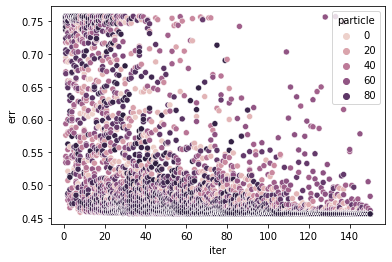

In [6]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

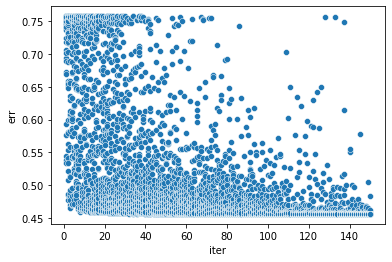

In [7]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

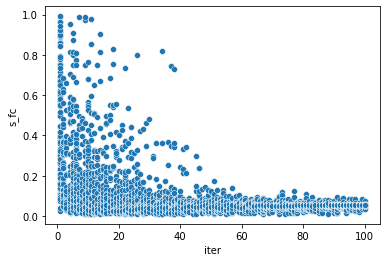

In [14]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [9]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.15722,
 'beta_rec': 0.100001,
 'beta_rec_post': 0.265409,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.052727,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.4,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 20,
 'gamma_fc': 0.581174,
 'gamma_cf': 0.5}

In [10]:
# prams.update({i:test[i].item() for i in what_to_fit})
# prams

### Run CMR2 on the Best Params

In [11]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [12]:
rng = np.random.default_rng(seed=42)

In [13]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,350
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,350
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,350
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,350


In [14]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [15]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 140.11649537086487


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.939295,0.000000
57766,0,1,26,0.0,1.469757,0.022386
58224,0,2,33,0.0,1.869306,0.034410
58695,0,3,151,0.0,3.076933,0.059328
59159,0,4,187,0.0,3.874865,0.070857
...,...,...,...,...,...,...
337333,350,575,60,1.0,48.431850,0.602861
337508,350,576,10,1.0,46.826870,0.604546
337682,350,577,265,1.0,28.895222,0.628685
337870,350,578,213,1.0,46.211479,0.605207


In [31]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.939295,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,1.469757,0.022386,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,1.869306,0.034410,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,3.076933,0.059328,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,3.874865,0.070857,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203575,350,575,60,1.0,48.431850,0.602861,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
203576,350,576,10,1.0,46.826870,0.604546,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
203577,350,577,265,1.0,28.895222,0.628685,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
203578,350,578,213,1.0,46.211479,0.605207,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


In [17]:
def loftus_masson(df, sub_cols, cond_col, value_col, within_cols=[]):
    
    if not isinstance(sub_cols, list):
        sub_cols = [sub_cols]
    if not isinstance(within_cols, list):
        within_cols = [within_cols]
    df = df.copy()
    if len(within_cols) > 0:
        df['M'] = df.groupby(within_cols)[value_col].transform('mean')
    else:
        df['M'] = df[value_col].mean()
    df['M_S'] = df.groupby(sub_cols + within_cols)[value_col].transform('mean')
    df['adj_' + value_col] = (df[value_col] + df['M'] - df['M_S'])
    
    return df

In [32]:
df_new = df_new.loc[(df_new.rt < 3000) & (df_new.rt > 400)&(df_new.position > 10)&(df_new.old == df_new.yes)]
df_new = loftus_masson(df_new, 'subject_ID', [], 'rt')
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length,M,M_S,adj_rt
11,0,11,246,0.0,24.742702,0.163558,582.095,0,SPARROW,0,Birds,1.0,Birds,False,0,5.0,5,1275.22641,1394.877643,462.443767
12,0,12,41,0.0,12.334500,0.128751,680.490,0,CARDINAL,0,Birds,1.0,Birds,False,0,6.0,6,1275.22641,1394.877643,560.838767
13,0,13,89,0.0,20.975031,0.155298,892.380,0,DRUM,0,Uncategorized,1.0,Instruments,False,0,NaN,0,1275.22641,1394.877643,772.728767
14,0,14,62,0.0,21.481409,0.156491,912.085,0,COMPUTER,0,Uncategorized,1.0,Electronics,False,0,NaN,0,1275.22641,1394.877643,792.433767
15,0,15,274,0.0,25.487118,0.165040,1030.440,0,TRAIN,0,Uncategorized-Singleton,1.0,Vehicles,False,0,NaN,1,1275.22641,1394.877643,910.788767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203572,350,572,291,1.0,35.772179,0.618010,1522.000,656,WATER,29,Beverages,8.0,Beverages,True,1,17.0,17,1275.22641,1407.889849,1389.336562
203573,350,573,84,1.0,33.234097,0.621690,1545.000,656,DOVE,84,Birds,8.0,Birds,True,1,21.0,21,1275.22641,1407.889849,1412.336562
203576,350,576,10,1.0,46.826870,0.604546,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23,1275.22641,1407.889849,2225.336562
203577,350,577,265,1.0,28.895222,0.628685,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19,1275.22641,1407.889849,1106.336561


In [58]:
df_new = df_new.loc[df_new.position > 10]
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length,M,M_S,adj_rt,csim_diff,csim_score,s_score
11,0,11,246,0.0,1413.818882,0.162345,582.095,0,SPARROW,0,Birds,1.0,Birds,False,0,5.0,5,1295.52446,1438.171646,439.447814,-0.237655,-1.851856,-0.683325
12,0,12,41,0.0,1279.969205,0.127754,680.490,0,CARDINAL,0,Birds,1.0,Birds,False,0,6.0,6,1295.52446,1438.171646,537.842814,-0.272246,-1.649808,-0.782783
13,0,13,89,0.0,1380.658826,0.154091,892.380,0,DRUM,0,Uncategorized,1.0,Instruments,False,0,NaN,0,1295.52446,1438.171646,749.732814,-0.245909,-1.317658,-0.707059
14,0,14,62,0.0,1385.366889,0.155275,912.085,0,COMPUTER,0,Uncategorized,1.0,Electronics,False,0,NaN,0,1295.52446,1438.171646,769.437814,-0.244725,-1.291715,-0.703654
15,0,15,274,0.0,1419.691813,0.163787,1030.440,0,TRAIN,0,Uncategorized-Singleton,1.0,Vehicles,False,0,NaN,1,1295.52446,1438.171646,887.792814,-0.236213,-1.148636,-0.679180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203575,350,575,60,1.0,5030.016754,0.603738,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18,1295.52446,1424.307155,1782.217304,0.203738,-0.451761,0.585804
203576,350,576,10,1.0,1550.060811,0.605658,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23,1295.52446,1424.307155,2229.217305,0.205658,0.227969,0.591325
203577,350,577,265,1.0,1446.103453,0.629802,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19,1295.52446,1424.307155,1110.217304,0.229802,0.925064,0.660747
203578,350,578,213,1.0,5067.175598,0.606298,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23,1295.52446,1424.307155,1438.217305,0.206298,-0.666215,0.593164


In [30]:
df_new.loc[df_new.old == df_new.yes]

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length,M,M_S,adj_rt,csim_diff,csim_score,s_score
0,0,0,53,0.0,881.679528,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0,1295.52446,1438.171646,1372.227814,-0.400000,-0.713184,-1.155546
1,0,1,26,0.0,940.582312,0.022386,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0,1295.52446,1438.171646,710.857814,-0.377614,-1.370902,-1.090876
2,0,2,33,0.0,973.82669,0.034410,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0,1295.52446,1438.171646,588.392814,-0.365590,-1.559980,-1.056141
3,0,3,151,0.0,1046.513049,0.059328,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1,1295.52446,1438.171646,706.307814,-0.340672,-1.377324,-0.984156
4,0,4,187,0.0,1081.954527,0.070857,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0,1295.52446,1438.171646,501.232814,-0.329143,-1.720304,-0.950850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203572,350,572,291,1.0,1491.552145,0.618010,1522.000,656,WATER,29,Beverages,8.0,Beverages,True,1,17.0,17,1295.52446,1424.307155,1393.217305,0.218010,0.698004,0.629802
203573,350,573,84,1.0,1475.780717,0.621690,1545.000,656,DOVE,84,Birds,8.0,Birds,True,1,21.0,21,1295.52446,1424.307155,1416.217305,0.221690,0.681630,0.640432
203576,350,576,10,1.0,1550.711602,0.604546,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23,1295.52446,1424.307155,2229.217305,0.204546,0.227969,0.590905
203577,350,577,265,1.0,1446.257917,0.628685,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19,1295.52446,1424.307155,1110.217304,0.228685,0.925064,0.660640


In [19]:
a = 2800
c_thresh = 0.4
import statsmodels.formula.api as smf

In [20]:
df_new['csim_diff'] = df_new['csim'] - c_thresh
df_new['csim_score'] = np.power(-1, df_new['yes']) * (np.log(df_new.adj_rt) - np.log(a)) 
df_new.csim_score = df_new.csim_score.astype("float")
mod = smf.ols(formula='csim_score ~ -1 + csim_diff', data=df_new)
res = mod.fit()
mse = res.mse_resid

/home1/beigejin/.conda/envs/jinbeige/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
mse

0.45589759445095285

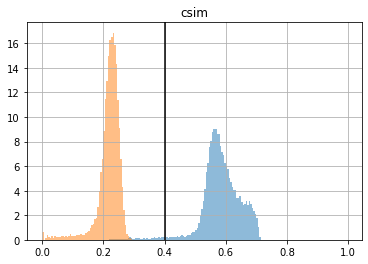

In [34]:
bin_arr = np.arange(0,1,0.005)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = True,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = True, alpha=0.5)
plt.axvline(prams["c_thresh"], color = 'k')
plt.show()

In [23]:
b = res.params[0]
df_new['s_score'] = b * df_new['csim_diff']
df_new['s_rt'] = np.exp(df_new['s_score'] * np.power(-1, df_new['yes']) + np.log(a))

array([[<AxesSubplot:title={'center':'s_rt'}>]], dtype=object)

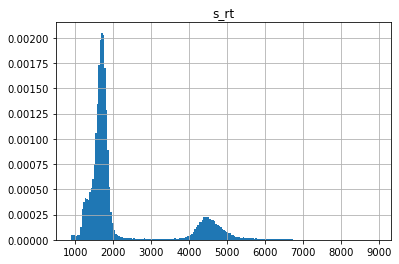

In [25]:
df_new.hist(column = 's_rt', bins=200, cumulative=False, density=1)

array([[<AxesSubplot:title={'center':'rt'}>]], dtype=object)

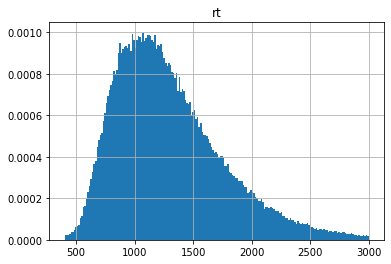

In [24]:
df_new.hist(column = 'rt', bins=200, cumulative=False, density=1)

array([[<AxesSubplot:title={'center':'csim_score'}>]], dtype=object)

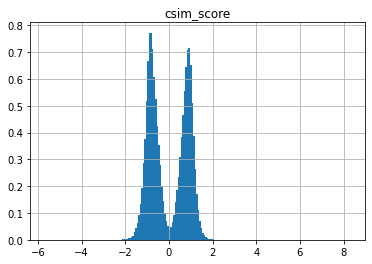

In [27]:
df_new.hist(column = 'csim_score', bins=200, cumulative=False, density=1)

In [29]:
f = folder.rstrip("/")

In [30]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)

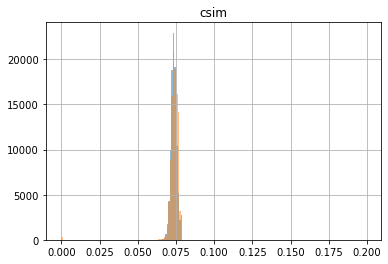

In [60]:
bin_arr = np.arange(0,0.2,0.001)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = False,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = False, alpha=0.5)
# plt.axvline(c, color = 'k')
plt.show()